In [1]:
import pandas as pd

In [7]:
df=pd.read_csv("online-shoppers-intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [8]:
df.isnull().sum() #missing value

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [10]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(df["Month"])
le.classes_

df["Month"]=le.transform(df["Month"])

In [11]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(df["VisitorType"])
le.classes_
df["VisitorType"]=le.transform(df["VisitorType"])

In [12]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(df["Weekend"])
le.classes_
df["Weekend"]=le.transform(df["Weekend"])

In [13]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(df["Revenue"])
le.classes_
df["Revenue"]=le.transform(df["Revenue"])

In [14]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

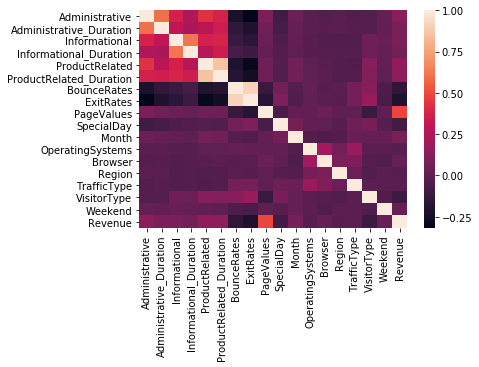

In [18]:
sns.heatmap(df.corr())

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


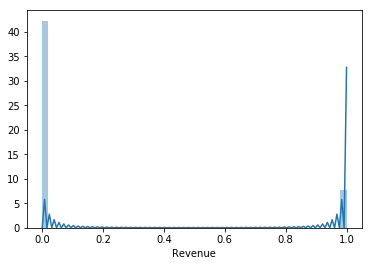

In [38]:
sns.distplot(df['Revenue'])

In [27]:
y=df[["Revenue"]]
#x=df[["Administrative","Administrative_Duration","Informational","Informational_Duration","ProductRelated","ProductRelated_Duration","BounceRates","ExitRates","PageValues","SpecialDay","Month","OperatingSystems","Browser","Region","TrafficType","VisitorType","Weekend"]]
x=df.drop("Revenue",axis=1)

In [28]:
df.shape

(12330, 18)

In [29]:
y.shape

(12330, 1)

In [30]:
x.shape

(12330, 17)

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [35]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)  

In [38]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200, random_state=100)  
clf.fit(x_train, y_train)  
y_pred =clf.predict(x_test)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
from sklearn import metrics  
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9059205190592052


In [41]:
ad=clf.feature_importances_
ad

array([0.04159947, 0.05915653, 0.01685274, 0.02629856, 0.07326962,
       0.09023345, 0.0548286 , 0.09247394, 0.37721614, 0.00340357,
       0.0438111 , 0.01763657, 0.01862871, 0.0301985 , 0.03175222,
       0.01259976, 0.01004053])

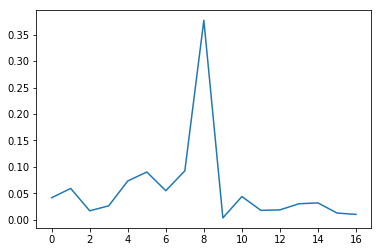

In [42]:
plt.plot(ad)

In [44]:
x.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')

In [43]:
impdf=pd.DataFrame(ad,index=x.columns)
impdf

,0
Administrative,0.041599
Administrative_Duration,0.059157
Informational,0.016853
Informational_Duration,0.026299
ProductRelated,0.073270
ProductRelated_Duration,0.090233
BounceRates,0.054829
ExitRates,0.092474
PageValues,0.377216
SpecialDay,0.003404


No handles with labels found to put in legend.


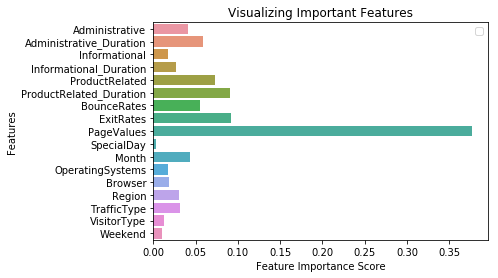

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=clf.feature_importances_,y=x.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [51]:
# Important features in this datasets are PageValues,ExitRates,BounceRates,ProductRelated_Duration,ProductRelates,Administrative,Administrative_Duration,Informational_Duration,Month,Region,trafficType
#There is no significant in SpecialDay,VisitorType,Weekend,Informational

In [46]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[2006,   85],
       [ 147,  228]], dtype=int64)

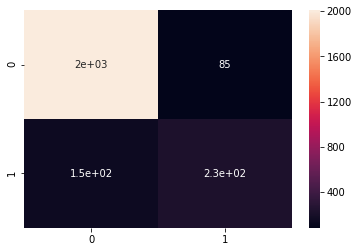

In [47]:
sns.heatmap(cm,annot=True)

In [54]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)
kf.get_n_splits(x)
print(kf)
KFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)

    

KFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [ 6165  6166  6167 ... 12327 12328 12329] TEST: [   0    1    2 ... 6162 6163 6164]
TRAIN: [   0    1    2 ... 6162 6163 6164] TEST: [ 6165  6166  6167 ... 12327 12328 12329]


In [48]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf,x_train,y_train, scoring='accuracy', cv=10)
print(scores)
print (scores.mean())
#data = cross_validation.KFold(len(x_train), n_folds=10, indices=False) 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

[0.90688259 0.89564336 0.90374873 0.91176471 0.89655172 0.89756592
 0.90669371 0.91176471 0.89249493 0.90669371]
0.9029804100122261
